Name: Muhammad Umair Jabbar
Student ID: 21031238

# Problem Satement
A Business wants to predict the Fraudalent Transactions and aslo wants some insights to tackle it better

# Data Exploration (EDA and Visualization)

## Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel('Fraud_Data_Final(1).xlsx', header = 0)
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,days,is_fraud
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,52,0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,0,1
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,6,0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,50,0


In [3]:
#describing the data to look at quantitative statistics
df.describe()

,user_id,purchase_value,age,ip_address,days,is_fraud
count,151112.000000,151112.000000,144546.000000,1.511120e+05,151112.000000,151112.000000
mean,200171.040970,36.976110,33.147095,2.152145e+09,57.084169,0.093646
std,115369.285024,19.857262,8.811238,1.248497e+09,36.185696,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000,0.000000
25%,100642.500000,22.000000,26.000000,1.085934e+09,25.000000,0.000000
50%,199958.000000,35.000000,32.000000,2.154770e+09,57.000000,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,88.000000,0.000000
max,400000.000000,1540.000000,76.000000,4.294850e+09,120.000000,1.000000


In [4]:
#looking at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


In [13]:
#looking for null values in each column
nulls = df.isnull().sum()
nulls

user_id              0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age               6566
ip_address           0
days                 0
is_fraud             0
dtype: int64

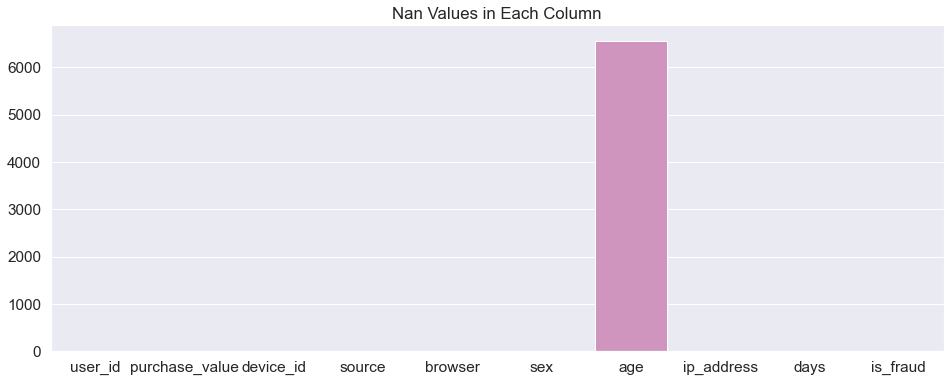

In [44]:
sns.set( rc = {'figure.figsize':(16,6)}, font_scale=1.4 )
sns.barplot(nulls.index,nulls.values)
plt.title("Nan Values in Each Column")
plt.show()

-------
source
-------


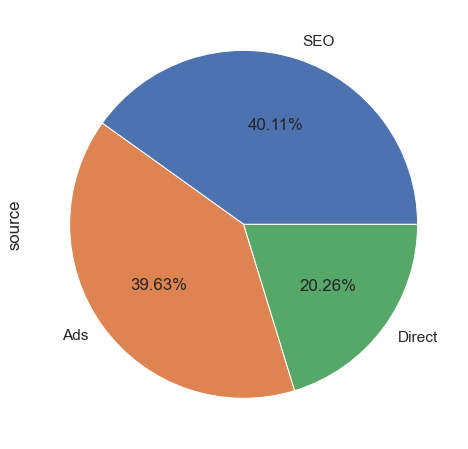

-------
browser
-------


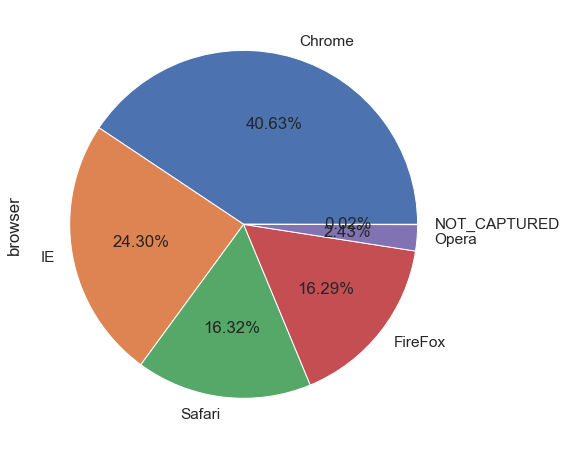

-------
sex
-------


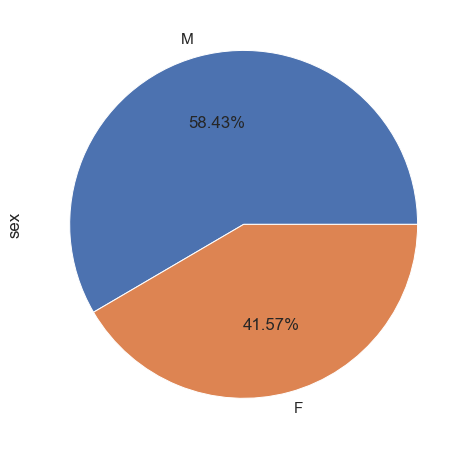

In [46]:
#viulizing catagorical data
for i in df.columns:
    if(df[i].dtype==object):
        if(i!='device_id'):
            print('-------')
            print(i)
            print('-------')
            plt.figure(figsize=(8,8))
            df[i].value_counts().plot(kind='pie', autopct='%1.2f%%')
            plt.show()
    

-------
user_id
-------


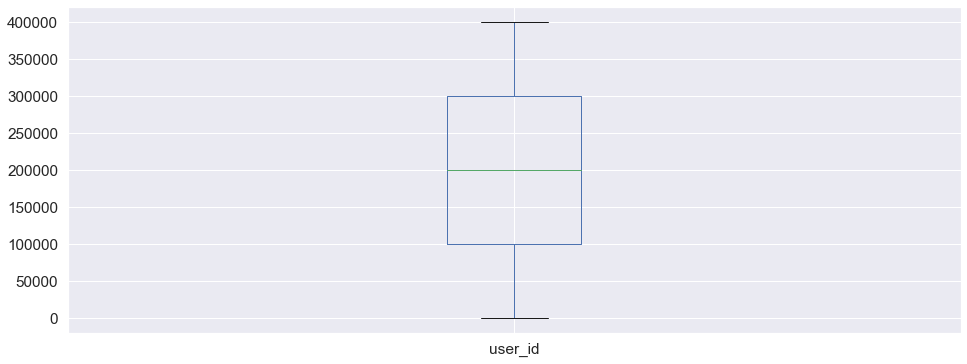

-------
purchase_value
-------


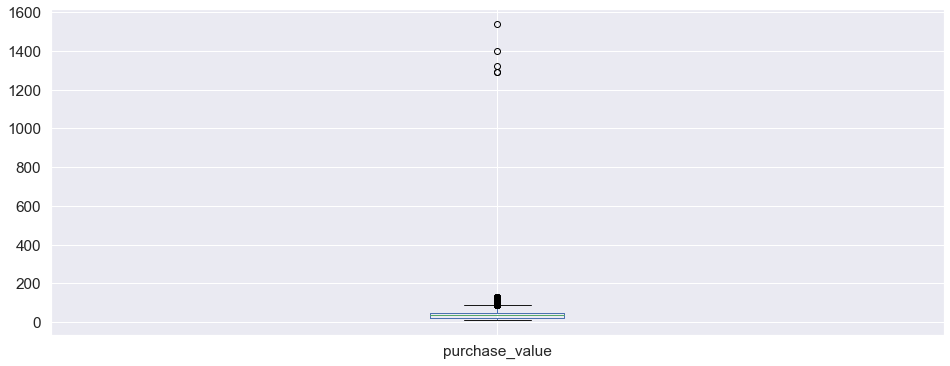

-------
age
-------


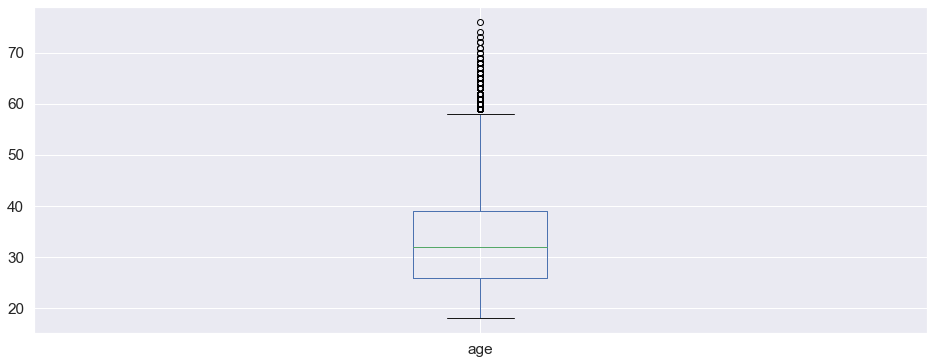

-------
ip_address
-------


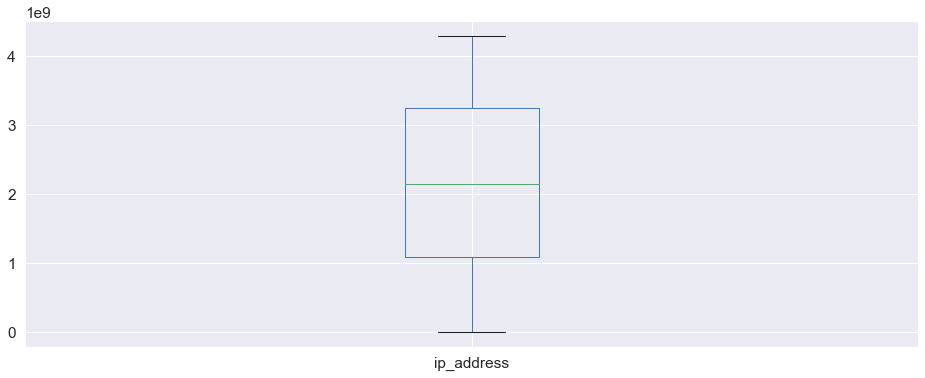

-------
days
-------


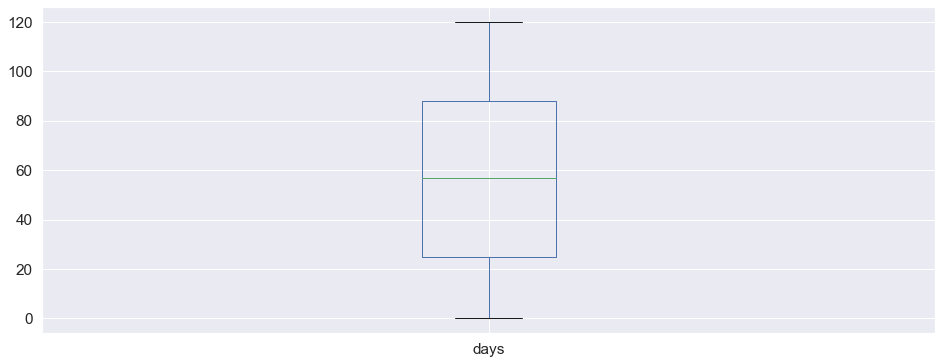

In [47]:
#viulizing numarical data
for i in df.columns:
    if(df[i].dtype != object):
        if(i != 'is_fraud'):
            print('-------')
            print(i)
            print('-------')
            df[i].plot(kind='box')
            plt.show()
    

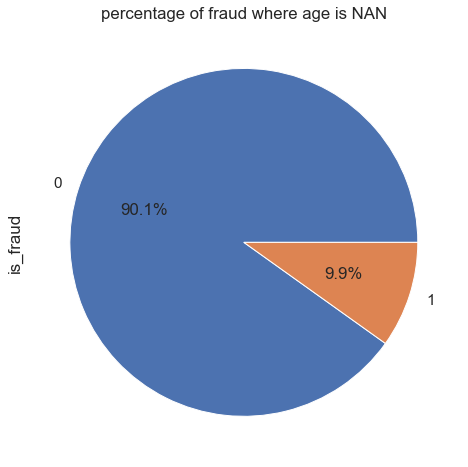

In [51]:
#checking percentage of fraud where age is NAN
plt.figure(figsize=(8,8))
plt.title("percentage of fraud where age is NAN")
df[df['age'].isnull()]['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## As there are fraudulent transacions where age is nan so filling these values with mean of age column 

In [11]:
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
#again checking for null
df.isnull().sum()

user_id           0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
days              0
is_fraud          0
dtype: int64

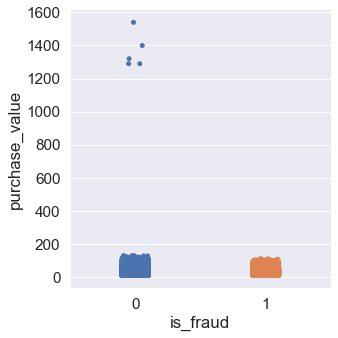

In [52]:
#viulizing purchase value column with respect to fraud and not fraud
sns.catplot(x='is_fraud',y = 'purchase_value' , data=df)
plt.show()

## It can be seen that the purchase_value column contains outliers

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             151112 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


In [14]:
#removing rows where there are outliers in purchase value column
df = df[df['purchase_value']<400]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151107 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151107 non-null  int64  
 1   purchase_value  151107 non-null  int64  
 2   device_id       151107 non-null  object 
 3   source          151107 non-null  object 
 4   browser         151107 non-null  object 
 5   sex             151107 non-null  object 
 6   age             151107 non-null  float64
 7   ip_address      151107 non-null  float64
 8   days            151107 non-null  int64  
 9   is_fraud        151107 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 12.7+ MB


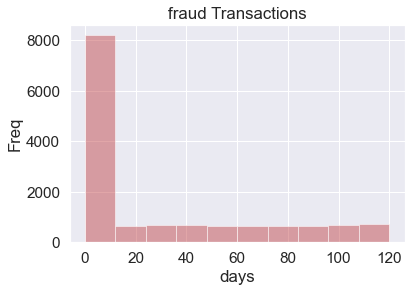

Text(0.5, 1.0, 'Not fraud Transactions')

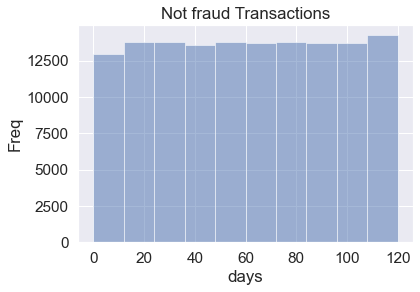

In [55]:
# fraud and non fraud transactions with respect to difference between signup day to first purchase day
sns.set( rc = {'figure.figsize':(6,4)}, font_scale=1.4 )

da1 = df[ (df['is_fraud']==1)]['days']
da1.plot(kind='hist',color='r', alpha=0.5)
plt.xlabel('days')
plt.ylabel('Freq')
plt.title('fraud Transactions')
plt.show()
da2 = df[ (df['is_fraud']==0)]['days']
da2.plot(kind='hist',color='b', alpha=0.5)
plt.xlabel('days')
plt.ylabel('Freq')
plt.title('Not fraud Transactions')


## it can be clearly seen that purchase made as the same day of signup has more percentage of occurance in fraud data
## on the other hand in Not_fraud it is normalized 

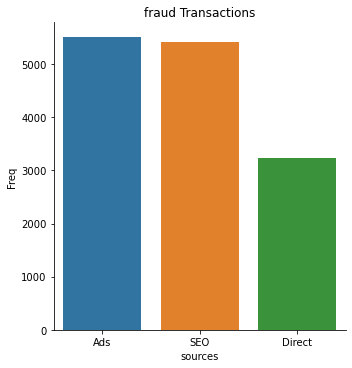

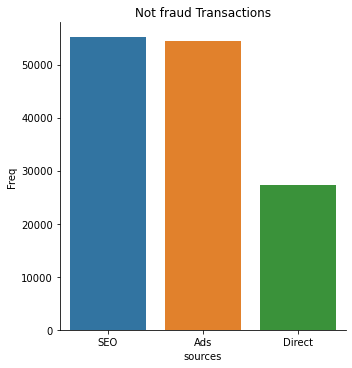

In [17]:
# fraud and nonfraud data with respect sources
da1 = df[ (df['is_fraud']==1)]
y=[]
for i in da1['source'].value_counts().values:
    y.append(i)
x=[]
for i in da1['source'].value_counts().index:
    x.append(i)
sns.catplot(x=x, y=y, data=da1, kind='bar')
plt.xlabel('sources')
plt.ylabel('Freq')
plt.title('fraud Transactions')
plt.show()

da2 = df[ (df['is_fraud']==0)]
y=[]
for i in da2['source'].value_counts().values:
    y.append(i)
x=[]
for i in da2['source'].value_counts().index:
    x.append(i)
sns.catplot(x=x, y=y, data=da1, kind='bar')
plt.xlabel('sources')
plt.ylabel('Freq')
plt.title('Not fraud Transactions')
plt.show()

## sources used seemed to be similar for both fraud and non fraud there doesnt seemed to be any problem

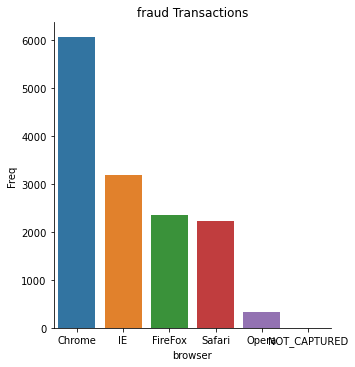

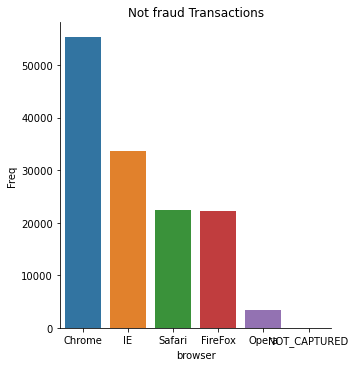

In [18]:
# fraud and nonfraud data with respect browser
da1 = df[ (df['is_fraud']==1)]
y=[]
for i in da1['browser'].value_counts().values:
    y.append(i)
x=[]
for i in da1['browser'].value_counts().index:
    x.append(i)
sns.catplot(x=x, y=y, data=da1, kind='bar')
plt.xlabel('browser')
plt.ylabel('Freq')
plt.title('fraud Transactions')
plt.show()

da2 = df[ (df['is_fraud']==0)]
y=[]
for i in da2['browser'].value_counts().values:
    y.append(i)
x=[]
for i in da2['browser'].value_counts().index:
    x.append(i)
sns.catplot(x=x, y=y, data=da1, kind='bar')
plt.xlabel('browser')
plt.ylabel('Freq')
plt.title('Not fraud Transactions')
plt.show()

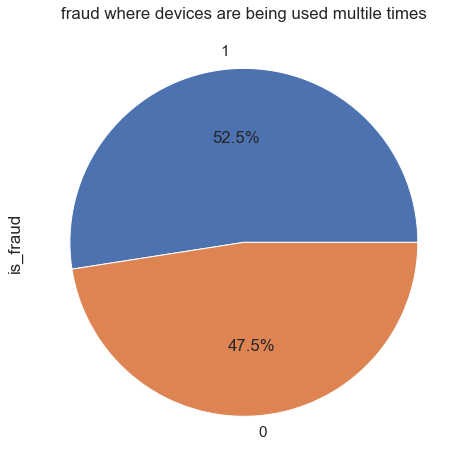

In [58]:
#looking for fraud where devices are being used multile times
plt.figure(figsize=(8,8))
plt.title("fraud where devices are being used multile times")
df[df.duplicated(['device_id'],keep=False)]['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# This also shows that the people are making fraudelent transactions multiple times

# Buliding Model (Evaluation)
Feature Engineering, fature selection, PCA analysis

In [20]:
#loading the preprocessed data

df.head()


,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,days,is_fraud
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,52,0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,0,1
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,6,0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,50,0


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['source'] = le.fit_transform(df.source.values)
df['browser'] = le.fit_transform(df.browser.values)
df['sex'] = le.fit_transform(df.sex.values)


<ipython-input-30-d0062123e27b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'] = le.fit_transform(df.source.values)
<ipython-input-30-d0062123e27b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['browser'] = le.fit_transform(df.browser.values)
<ipython-input-30-d0062123e27b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [21]:

#dropping the rows containing nan values
print(df.shape)
df.dropna(axis=0, inplace=True)
print(df.shape)




(151107, 10)
(151107, 10)


<ipython-input-21-e77898c0113b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


-------
user_id
-------


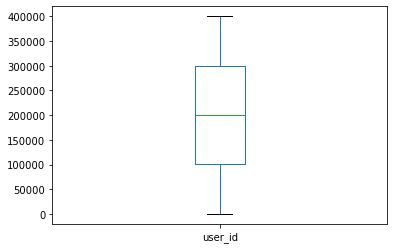

-------
purchase_value
-------


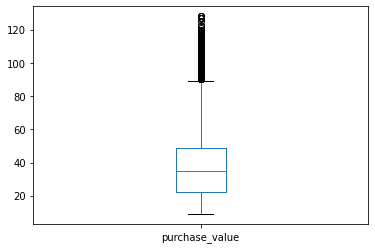

-------
age
-------


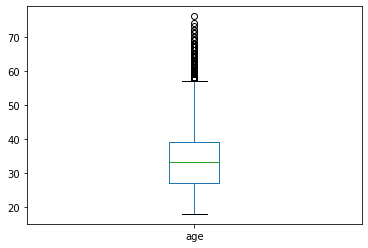

-------
ip_address
-------


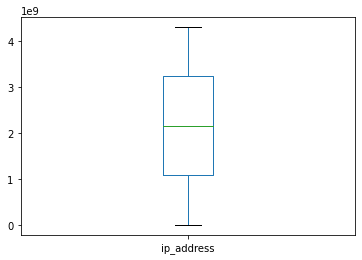

-------
days
-------


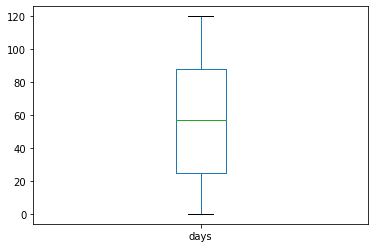

-------
is_fraud
-------


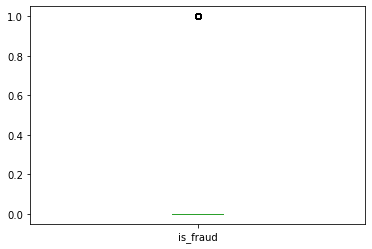

In [22]:
#viulizing numarical data
for i in df.columns:
    if(df[i].dtype != object):
        if(i != 'is_promoted'):
            print('-------')
            print(i)
            print('-------')
            df[i].plot(kind='box')
            plt.show()


In [31]:

#dividing data and labels to different variables
x=df.drop(['is_fraud','user_id','device_id','ip_address'], axis=1)
y=df['is_fraud']
print(x.shape)
print(y.shape)


(151107, 6)
(151107,)


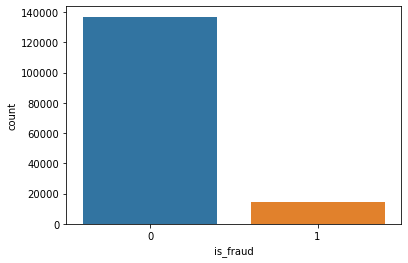

In [32]:

#visualizing y data
sns.countplot(y)





In [33]:
x

,purchase_value,source,browser,sex,age,days
0,34,2,0,1,39.0,52
1,16,0,0,0,53.0,0
2,15,2,4,1,53.0,0
3,44,2,5,1,41.0,6
4,39,0,5,1,45.0,50
...,...,...,...,...,...,...
151107,43,2,0,1,28.0,61
151108,35,2,5,1,32.0,11
151109,40,2,2,0,26.0,77
151110,46,2,0,1,37.0,60


In [34]:
#now normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled



array([[-0.16010055,  1.11443538, -0.87876634,  0.84349563,  0.67917376,
        -0.14051342],
       [-1.14295972, -1.12531493, -0.87876634, -1.1855426 ,  2.30373386,
        -1.57754351],
       [-1.19756301,  1.11443538,  1.37008195,  0.84349563,  2.30373386,
        -1.57754351],
       ...,
       [ 0.16751917,  1.11443538,  0.24565781, -1.1855426 , -0.82934634,
         0.55036643],
       [ 0.49513889,  1.11443538, -0.87876634,  0.84349563,  0.44709374,
         0.08056813],
       [-0.92454657, -0.00543978,  0.24565781,  0.84349563,  0.56313375,
        -0.44450056]])

In [35]:
# spliting data for training(90%) and testing(10%) 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(135996, 6)
(135996,)
(15111, 6)
(15111,)


### 1.2 Build the Model(s)



95.1359936470121


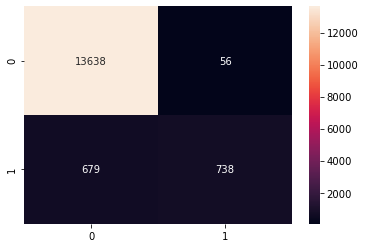

In [38]:
#----------------------DecisionTree Model
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(random_state=0, max_depth=7)
clf1.fit(x_train, y_train)
pred_1 = clf1.predict(x_test)
#checking acuracy
print(clf1.score(x_test,y_test)*100)

cm_1 = confusion_matrix(y_test,pred_1)
sns.heatmap(cm_1,annot=True,fmt="d")



94.97055125405333


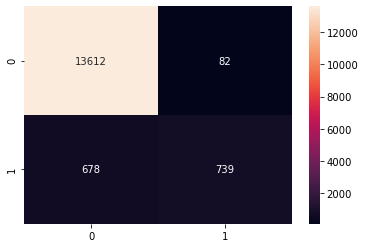

In [39]:
#----------------------RandomTree Model
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=0, max_depth=60)
clf2.fit(x_train, y_train)
pred_2 = clf2.predict(x_test)
#checking acuracy
print(clf2.score(x_test,y_test)*100)
# print(f"Accuracy : {accuracy_score(y_test,pred_2)*100}")

cm_2 = confusion_matrix(y_test,pred_2)
sns.heatmap(cm_2,annot=True,fmt="d")



95.1359936470121


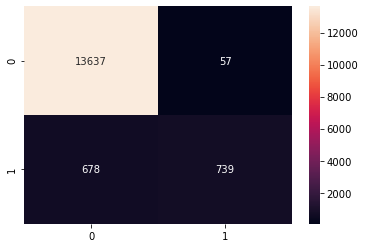

In [40]:
#----------------------AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier(random_state=0, n_estimators=300)
clf3.fit(x_train, y_train)
pred_3 = clf3.predict(x_test)
#checking acuracy
print(clf3.score(x_test,y_test)*100)


cm_3 = confusion_matrix(y_test,pred_3)
sns.heatmap(cm_3,annot=True,fmt="d")



95.1359936470121


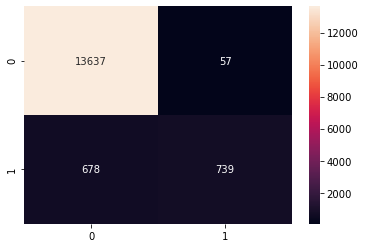

In [41]:
#-----------------------GradientTree class
from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1)
clf4.fit(x_train,y_train)
pred_4 = clf4.predict(x_test)
#checking accuracy
print(clf4.score(x_test, y_test)*100)

cm_4 = confusion_matrix(y_test,pred_4)
sns.heatmap(cm_4,annot=True,fmt="d")



94.30878168221825


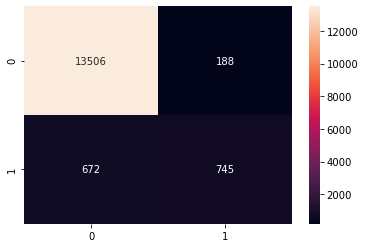

In [42]:
#-----------------------KNN Model
from sklearn.neighbors import KNeighborsClassifier

clf5 = KNeighborsClassifier(n_neighbors=30, weights="distance", p=2, n_jobs=-1)
clf5.fit(x_train, y_train)
pred_5 = clf5.predict(x_test)
#checking acuracy
print(clf5.score(x_test,y_test)*100)

cm_5 = confusion_matrix(y_test,pred_5)
sns.heatmap(cm_5,annot=True,fmt="d")




#So from the above models it can be seen that adabost and gradient tree model performs slightly better


### 1.3 Evaluate and Improve the Model(s)


In [43]:

#--------------------------------------------------built in ensembling model
from sklearn.ensemble import VotingClassifier
ensemble_result = VotingClassifier(estimators=[('Decision Tree', clf1), ('Random Forest', clf2), ('Adaboost', clf3), ('Gradient Tree', clf4), ('KNN model', clf5)], 
                       voting='soft', weights=[2,2,3,2,1]).fit(x_train,y_train)
print('The accuracy of 5 models is:',ensemble_result.score(x_test,y_test)*100)



The accuracy of 5 models is: 95.14922903844881


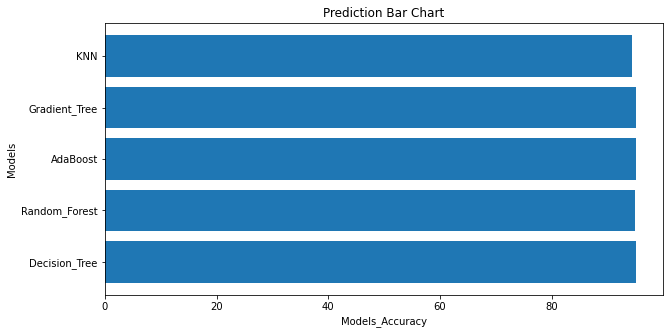

In [44]:
dt_ = clf1.score(x_test,y_test)*100
rf_ = clf2.score(x_test,y_test)*100
ab_ = clf3.score(x_test,y_test)*100
gt_ = clf4.score(x_test,y_test)*100
knn_ = clf5.score(x_test,y_test)*100

nam1 = ["Decision_Tree","Random_Forest","AdaBoost","Gradient_Tree","KNN"]
ave  = [dt_,rf_,ab_,gt_,knn_]

plt.barh(nam1,ave)
plt.xlabel('Models_Accuracy')
plt.ylabel('Models')
plt.title('Prediction Bar Chart')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()




In [49]:
#we can see from the above graph as well adabost and gradient tree model performs slightly better


In [50]:
from sklearn.decomposition import PCA

pca = PCA(0.999)

x_pca = pca.fit_transform(x)
x_pca.shape

#looking at how many percent of useful information is being captured by the the selected features
pca.explained_variance_ratio_

#now again fitting the model to get to know how much it can affect the training of the model
x_train , x_test , y_train , y_test = train_test_split(x_pca, y, test_size=0.1, random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(135996, 4)
(135996,)
(15111, 4)
(15111,)


95.16246442988552


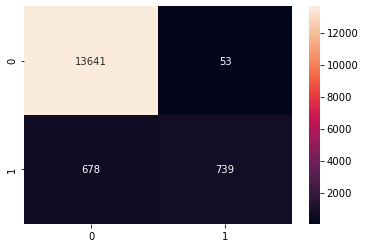

In [47]:
#----------------------RandomTree Model
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=4, max_depth=20 )
clf2.fit(x_train, y_train)
pred_2 = clf2.predict(x_test)
#checking acuracy
print(clf2.score(x_test,y_test)*100)
# print(f"Accuracy : {accuracy_score(y_test,pred_2)*100}")

cm_2 = confusion_matrix(y_test,pred_2)
sns.heatmap(cm_2,annot=True,fmt="d")




so w can see that from the above accuracy that after loosing some features it's accuracy became better
 the original columns(i.e when all the columns were used)


# I have provided the insights/problems in text cells above 